**Load Training and Testing Datasets**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# Load training and testing datasets from Excel files
train_df = pd.read_excel("/content/drive/MyDrive/Dataset/Training Dataset.xlsx")
test_df = pd.read_excel("/content/drive/MyDrive/Dataset/Testing Dataset.xlsx")


**Exploratory Data Analysis (EDA)**

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB
None

Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 

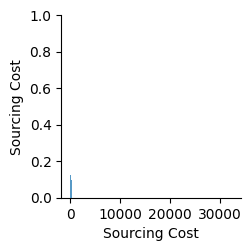

In [8]:
# Display basic information about the datasets
print("Training Data Info:")
print(train_df.info())
print("\nTesting Data Info:")
print(test_df.info())

# Display descriptive statistics
print("\nTraining Data Description:")
print(train_df.describe())
print("\nTesting Data Description:")
print(test_df.describe())

# Visualize distributions of features and target variable
sns.pairplot(train_df)
plt.show()

Training Data Head:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder        2021-05-01         10.158  
1       Powder        2020-10-01        134.281  
2       Powder        2020-12-01         12.456  
3       Powder        2021-02-01        107.220  
4       Liquid        2020-11-01        197.763  

Testing Data Head:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM1           X1        A1           DIRECT        Small   
1        NTM1           X1       A10           DIRECT        Large   
2        NTM1           X1   

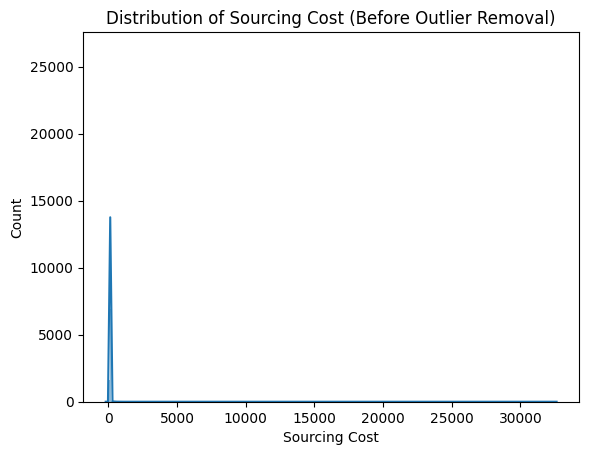

Number of samples before outlier removal: 550176
Number of samples after outlier removal: 542569
Non-numeric values in 'Sourcing Cost' column: 275       2.043504e-15
287       3.413936e-15
967       7.105427e-15
1816      7.105427e-15
2469      1.421085e-14
              ...     
549763    2.386980e-15
549865    3.552714e-15
550030    3.552714e-15
550086    1.332268e-15
550087    1.421085e-14
Name: Sourcing Cost, Length: 2573, dtype: float64
Missing Values in Training Data:
 ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


In [9]:
# Step 1: Data Loading
# Display the first few rows of the training and testing datasets to inspect the data
print("Training Data Head:")
print(train_df.head())
print("\nTesting Data Head:")
print(test_df.head())

# Step 2: Outlier Removal
# Visualize the distribution of 'Sourcing Cost' before outlier removal to understand the data distribution
sns.histplot(train_df['Sourcing Cost'], kde=True)
plt.title("Distribution of Sourcing Cost (Before Outlier Removal)")
plt.show()

# Check the number of samples before outlier removal
print("Number of samples before outlier removal:", train_df.shape[0])

# Perform outlier removal
train_df = train_df[(train_df['Sourcing Cost'] >= 0) & (train_df['Sourcing Cost'] <= train_df['Sourcing Cost'].quantile(0.99))]

# Check the number of samples after outlier removal
print("Number of samples after outlier removal:", train_df.shape[0])

# Step 3: Non-Numeric Value Handling
# Check for non-numeric values in the 'Sourcing Cost' column
non_numeric_values = train_df[~train_df['Sourcing Cost'].apply(lambda x: str(x).replace('.', '').isdigit())]['Sourcing Cost']
print("Non-numeric values in 'Sourcing Cost' column:", non_numeric_values)

# Step 4: Missing Value Handling
# Check for missing values in the dataset
missing_values_train = train_df.isnull().sum()
print("Missing Values in Training Data:\n", missing_values_train)

# If there are missing values, handle them appropriately (e.g., imputation or removal)

# Proceed with model training only if there are samples left after preprocessing
if train_df.shape[0] > 0:
    # Further preprocessing and model training steps
    ...
else:
    print("No samples left in the training dataset after preprocessing.")


In [22]:
# Convert 'Month of Sourcing' column to a consistent data type (e.g., string representation of month)
X_train_encoded['Month of Sourcing'] = X_train_encoded['Month of Sourcing'].astype(str).str[:7]  # Extract YYYY-MM format
X_test_encoded['Month of Sourcing'] = X_test_encoded['Month of Sourcing'].astype(str).str[:7]  # Extract YYYY-MM format


**RANDOM FOREST REGRESSOR MODEL**

In [23]:
from sklearn.preprocessing import LabelEncoder


# Initialize label encoder
label_encoder = LabelEncoder()

# Fit label encoder on concatenated training and testing data
label_encoder.fit(pd.concat([X_train_encoded['Month of Sourcing'], X_test_encoded['Month of Sourcing']]))

# Transform 'Month of Sourcing' column in both training and testing datasets
X_train_encoded['Month of Sourcing'] = label_encoder.transform(X_train_encoded['Month of Sourcing'])
X_test_encoded['Month of Sourcing'] = label_encoder.transform(X_test_encoded['Month of Sourcing'])

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_encoded, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test_encoded)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 20.34197704356383
Mean Squared Error (MSE): 1215.3815526879596


In [26]:
from sklearn.metrics import r2_score

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.5520087255398178


**LINEAR REGRESSION**

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train_encoded, y_train)

# Make predictions on the testing data
y_pred_linear = linear_reg_model.predict(X_test_encoded)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print evaluation metrics
print("Linear Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_linear)
print("Mean Squared Error (MSE):", mse_linear)
print("R2 Score:", r2_linear)


Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 23.448924425661616
Mean Squared Error (MSE): 1402.0128530091422
R2 Score: 0.4832161773066017


In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 34.86232282404544


In [14]:
# One-hot encode categorical variables in training and testing datasets
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure that both datasets have the same columns after one-hot encoding
# This is important to maintain consistency in features between training and testing datasets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

In [16]:
print("Data types in training dataset:")
print(X_train_encoded.dtypes)

print("\nData types in testing dataset:")
print(X_test_encoded.dtypes)


Data types in training dataset:
Month of Sourcing          datetime64[ns]
ProductType_NTM1                     bool
ProductType_NTM2                     bool
ProductType_NTM3                     bool
Manufacturer_X1                      bool
                                ...      
Product Size_ExtraLarge              bool
Product Size_Large                   bool
Product Size_Small                   bool
Product Type_Liquid                  bool
Product Type_Powder                  bool
Length: 61, dtype: object

Data types in testing dataset:
Month of Sourcing          datetime64[ns]
ProductType_NTM1                     bool
ProductType_NTM2                     bool
ProductType_NTM3                     bool
Manufacturer_X1                      bool
                                ...      
Product Size_ExtraLarge              bool
Product Size_Large                   bool
Product Size_Small                   bool
Product Type_Liquid                  bool
Product Type_Powder         

***The lower values of MAE, MSE, and the higher R-squared score indicate better performance of the Random Forest model over the Linear Regression model***